In [28]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [29]:
cellLength = 40
cellWidth = 20
cell = mp.Vector3(cellLength,cellWidth) 

In [30]:
#Area Size in µm

In [31]:
wavelength = 1.65

n = 3.4                 # index of waveguide
w = 0.4                 # width of waveguide
h = 0.22                # height of waveguide
r = 6.8                 # inner radius of ring
pad = 0.3               # padding between waveguide and edge of PML
length = 10              # length of ring

psrc = r+1.5*w+pad
cbpsrc = r+0.5*w

In [32]:
c11 = mp.Cylinder(radius=r+w,height=h,
                 material=mp.Medium(index=n),
                 center=mp.Vector3(-length/2,0))

c12 = mp.Cylinder(radius=r,height=h,
                 center=mp.Vector3(-length/2,0))

c21 = mp.Cylinder(radius=r+w,height=h,
                 material=mp.Medium(index=n),
                 center=mp.Vector3(length/2,0))

c22 = mp.Cylinder(radius=r,height=h,
                 center=mp.Vector3(length/2,0))

# ----------------------------

c0 = mp.Cylinder(radius=r,height=h,
                 center=mp.Vector3(0,0))

cb0 = mp.Block(mp.Vector3(length,2*r,h),
                 center=mp.Vector3(0,0))

cb0 = mp.Block(mp.Vector3(length,2*r,h),
                 center=mp.Vector3(0,0))

cb1 = mp.Block(mp.Vector3(length,w,h),
                 center=mp.Vector3(0,-cbpsrc),
                 material=mp.Medium(index=n))
cb2 = mp.Block(mp.Vector3(length,w,0.22),
                 center=mp.Vector3(0,cbpsrc),
                 material=mp.Medium(index=n))

# ----------------------------
b1 = mp.Block(mp.Vector3(mp.inf,w,h),
                 center=mp.Vector3(0,-psrc),
                 material=mp.Medium(index=n))
b2 = mp.Block(mp.Vector3(mp.inf,w,h),
                 center=mp.Vector3(0,psrc),
                 material=mp.Medium(index=n))

In [33]:
geometry = [c11,c12,c21,c22,c0,cb0,cb1,cb2,b1,b2]

In [34]:
# Waveguide:length,width,height - position - material

In [35]:
pml_layers = [mp.PML(1)] # perfectly matched layer (PML)
resolution = 10 #pixels per distance unit 10 pixels/µm

In [36]:
sources = [mp.Source(mp.ContinuousSource(frequency=1/wavelength),
                     component=mp.Ez,
                     center=mp.Vector3(1-cellLength/2,psrc,h/2),
                     size=mp.Vector3(0,0.5))]

In [37]:
# Recall that, in Meep units, frequency is specified in units of 2πc
# which is equivalent to the inverse of the vacuum wavelength. 
# Thus, 0.15 corresponds to a vacuum wavelength of about 1/0.15=6.67 µm
# line source

In [38]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(0.6, mp.output_efield_z)),
        until=200)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000180006 s
Working in 2D dimensions.
Computational cell is 40 x 20 x 0 with resolution 10
     cylinder, center = (-5,0,0)
          radius 7.2, height 0.22, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.56,11.56,11.56)
     cylinder, center = (-5,0,0)
          radius 6.8, height 0.22, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (5,0,0)
          radius 7.2, height 0.22, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.56,11.56,11.56)
     cylinder, center = (5,0,0)
          radius 6.8, height 0.22, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 6.8, height 0.22, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (10,13.6,0.22)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielec

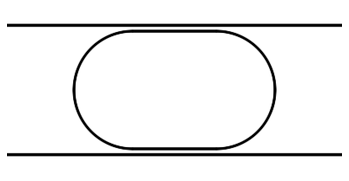

In [39]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

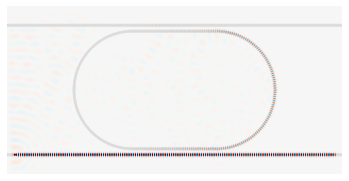

In [40]:
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()